In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def nothing(x):
    pass

In [10]:
frame = cv2.imread("/home/robin/rgb_crop.png", 0)
frame.min()

3

In [46]:
cv2.namedWindow("Trackbars", cv2.WINDOW_NORMAL)
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)

frame = cv2.imread("/home/robin/rgb2gray.png")

while True:
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
    
    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    
    final = cv2.hconcat([frame, result])
    #cv2.namedWindow("final", cv2.WINDOW_NORMAL)
    cv2.imshow("Trackbars", final)
    k = cv2.waitKey(1)
    if k == 27:
        break
cv2.destroyAllWindows()

In [47]:
# Import dependancies
import cv2

maxScaleUp = 100
scaleFactor = 1
windowName = "Resize Image"
trackbarValue = "Scale"

# read the image
image = cv2.imread("/home/robin/Pictures/Screenshot from 2021-10-07 23-09-38.png")

# Create a window to display results and  set the flag to Autosize
cv2.namedWindow(windowName, cv2.WINDOW_AUTOSIZE)

# Callback functions
def scaleImage(args):
    # Get the scale factor from the trackbar 
    scaleFactor = 1+ args/100.0
    # Resize the image
    scaledImage = cv2.resize(image, None, fx=scaleFactor, fy = scaleFactor, interpolation = cv2.INTER_LINEAR)
    cv2.imshow(windowName, scaledImage)

# Create trackbar and associate a callback function
cv2.createTrackbar(trackbarValue, windowName, scaleFactor, maxScaleUp, scaleImage)

# Display the image
cv2.imshow(windowName, image)
c = cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2 as cv
import sys

seeds = []
class App():
    
    
    def update(self, dummy=None):
        global final, seed_pt
        if self.seed_pt is None:
            cv.namedWindow('hsv_filter', cv.WINDOW_NORMAL)
            final = cv.hconcat([self.orig, self.img])
            cv.imshow('hsv_filter', final)
            return
        
        masked = self.img.copy()
        self.mask[:] = 0
        
        l_h = cv.getTrackbarPos("L - H", "hsv_filter")
        l_s = cv.getTrackbarPos("L - S", "hsv_filter")
        l_v = cv.getTrackbarPos("L - V", "hsv_filter")
        u_h = cv.getTrackbarPos("U - H", "hsv_filter")
        u_s = cv.getTrackbarPos("U - S", "hsv_filter")
        u_v = cv.getTrackbarPos("U - V", "hsv_filter")
        
        lower_hsv = np.array([l_h, l_s, l_v])
        upper_hsv = np.array([u_h, u_s, u_v])
        self.mask = cv.inRange(masked, lower_hsv, upper_hsv)
    
        result = cv.bitwise_and(masked, masked, mask=self.mask)
        cv.circle(result, self.seed_pt, 2, (0, 0, 255), -1)
        final = cv.hconcat([self.orig, result])
        cv.imshow('hsv_filter', final)
    
    def onmouse(self, event, x, y, flags, param):
        if flags & cv.EVENT_FLAG_LBUTTON:
            self.seed_pt = x, y
            seeds.append((self.seed_pt))
            self.update()
            
            
    def run(self):
        
        self.orig = cv.imread("/home/robin/rgb_good.png")
        self.img = cv.cvtColor(self.orig, cv.COLOR_BGR2HSV)
        if self.img is None:
            print('Failed to load image file:')
            sys.exit(1)

        h, w = self.img.shape[:2]
        self.mask = np.zeros((h+2, w+2), np.uint8)
        self.seed_pt = None
        self.update()
        cv.setMouseCallback('hsv_filter', self.onmouse)
        cv.createTrackbar("L - H", "hsv_filter", 0, 179, self.update)
        cv.createTrackbar("L - S", "hsv_filter", 0, 255, self.update)
        cv.createTrackbar("L - V", "hsv_filter", 0, 255, self.update)
        cv.createTrackbar("U - H", "hsv_filter", 179, 179, self.update)
        cv.createTrackbar("U - S", "hsv_filter", 255, 255, self.update)
        cv.createTrackbar("U - V", "hsv_filter", 255, 255, self.update)
        while True:
            ch = cv.waitKey()
            if ch == 27:
                break
        print("Done")
        
App().run()
cv.destroyAllWindows()

Done


In [24]:
import numpy as np
import cv2 as cv
import sys

masks = []
class App():
    
    
    def update(self, dummy=None):
        
        
        if not seed_pt :
            cv.namedWindow('hsv_filter', cv.WINDOW_NORMAL)
            expo = cv.hconcat([self.orig, self.img])
            cv.imshow('hsv_filter', expo)
            return
        
        masked = self.img.copy()
        self.mask[:] = 0
        
        l_h = cv.getTrackbarPos("L - H", "hsv_filter")
        l_s = cv.getTrackbarPos("L - S", "hsv_filter")
        l_v = cv.getTrackbarPos("L - V", "hsv_filter")
        u_h = cv.getTrackbarPos("U - H", "hsv_filter")
        u_s = cv.getTrackbarPos("U - S", "hsv_filter")
        u_v = cv.getTrackbarPos("U - V", "hsv_filter")
        
        lower_hsv = np.array([l_h, l_s, l_v])
        upper_hsv = np.array([u_h, u_s, u_v])
        self.mask = cv.inRange(masked, lower_hsv, upper_hsv)
    
        result = cv.bitwise_and(masked, masked, mask=self.mask)
        final = cv.hconcat([self.orig, result])
        
        cv.imshow('hsv_filter', final)
    
    def onmouse(self, event, x, y, flags, param):
        if flags & cv.EVENT_FLAG_LBUTTON:
            seed_pt.add((y, x))
            #seeds.append((seed_pt))
            self.update()
            
            
    def run(self):
        global seed_pt
        self.orig = cv.imread("/home/robin/rgb_good1.png")
        self.img = cv.cvtColor(self.orig, cv.COLOR_BGR2HSV)
        if self.img is None:
            print('Failed to load image file:')
            sys.exit(1)

        h, w = self.img.shape[:2]
        self.mask = np.zeros((h+2, w+2), np.uint8)
        seed_pt = set()
        self.update()
        cv.setMouseCallback('hsv_filter', self.onmouse)
        cv.createTrackbar("L - H", "hsv_filter", 0, 179, self.update)
        cv.createTrackbar("L - S", "hsv_filter", 0, 255, self.update)
        cv.createTrackbar("L - V", "hsv_filter", 0, 255, self.update)
        cv.createTrackbar("U - H", "hsv_filter", 179, 179, self.update)
        cv.createTrackbar("U - S", "hsv_filter", 255, 255, self.update)
        cv.createTrackbar("U - V", "hsv_filter", 255, 255, self.update)
        while True:
            ch = cv.waitKey()
            if ch == 27:
                break
            elif ch == ord('s'):
                masks.append(self.mask)
        print("Done")

App().run()
cv.destroyAllWindows()

Done


In [51]:
half_w = expo.shape[:2][1]//2
pix_list = list(seed_pt)
sel_pts = [x for x in pix_list if x[1]>half_w ]
hsv_vals = [tuple(expo[i]) for i in sel_pts]

In [3]:
import numpy as np
import cv2 as cv

class App():

    def update(self, dummy=None):
        if self.seed_pt is None:
            cv.namedWindow('floodfill', cv.WINDOW_NORMAL)
            cv.imshow('floodfill', self.img)
            return
        flooded = self.img.copy()
        self.mask[:] = 0
        lo = cv.getTrackbarPos('lo', 'floodfill')
        hi = cv.getTrackbarPos('hi', 'floodfill')
        flags = self.connectivity
        if self.fixed_range:
            flags |= cv.FLOODFILL_FIXED_RANGE
        cv.floodFill(flooded, self.mask, self.seed_pt, (255, 255, 255), (lo,)*3, (hi,)*3, flags)
        cv.circle(flooded, self.seed_pt, 2, (0, 0, 255), -1)
        cv.namedWindow('floodfill', cv.WINDOW_NORMAL)
        cv.imshow('floodfill', flooded)

    def onmouse(self, event, x, y, flags, param):
        if flags & cv.EVENT_FLAG_LBUTTON:
            self.seed_pt = x, y
            self.update()

    def run(self):
        

        self.img = cv.imread("/home/robin/rgb_good1.png")
        if self.img is None:
            print('Failed to load image file:', fn)
            sys.exit(1)

        h, w = self.img.shape[:2]
        self.mask = np.zeros((h+2, w+2), np.uint8)
        self.seed_pt = None
        self.fixed_range = True
        self.connectivity = 4

        self.update()
        cv.setMouseCallback('floodfill', self.onmouse)
        cv.createTrackbar('lo', 'floodfill', 20, 255, self.update)
        cv.createTrackbar('hi', 'floodfill', 20, 255, self.update)

        while True:
            ch = cv.waitKey()
            if ch == 27:
                cv.destroyAllWindows()
                break
            if ch == ord('f'):
                self.fixed_range = not self.fixed_range
                print('using %s range' % ('floating', 'fixed')[self.fixed_range])
                self.update()
            if ch == ord('c'):
                self.connectivity = 12-self.connectivity
                print('connectivity =', self.connectivity)
                self.update()

        print('Done')

App().run()


using floating range
using fixed range
Done


In [1]:
import numpy as np
import cv2 as cv
import sys

masks = []
class App():
    
    
    def update(self, dummy=None):
        
        if self.seed_pt is None:
            cv.namedWindow('hsv_filter', cv.WINDOW_NORMAL)
            
            cv.imshow('hsv_filter', self.img)
            return
        
        hsv = self.img.copy()
        rgb = self.orig.copy()
        #self.mask[:] = 0
        
        l_h = cv.getTrackbarPos("L - H", "hsv_filter")
        l_s = cv.getTrackbarPos("L - S", "hsv_filter")
        l_v = cv.getTrackbarPos("L - V", "hsv_filter")
        u_h = cv.getTrackbarPos("U - H", "hsv_filter")
        u_s = cv.getTrackbarPos("U - S", "hsv_filter")
        u_v = cv.getTrackbarPos("U - V", "hsv_filter")
        
        if self.seed_pt[0]<hsv.shape[1]:
            h,s,v = hsv[self.seed_pt[::-1]]
            lower_hsv = np.array([abs(h-l_h), abs(s-l_s), abs(v-l_v)])
            upper_hsv = np.array([h+u_h, s+u_s, v+u_v])
            #try:
            self.mask = cv.inRange(hsv, lower_hsv, upper_hsv)
            result = cv.bitwise_and(rgb, rgb, mask=self.mask)
            cv.circle(result, self.seed_pt, 5, (0, 0, 255), -1)
            cv.circle(self.orig, self.seed_pt, 5, (0, 0, 255), -1)
            final = cv.hconcat([self.img,result])
            cv.imshow('hsv_filter', final)
        
        
        
    
    def onmouse(self, event, x, y, flags, param):
        if flags & cv.EVENT_FLAG_LBUTTON:
            self.seed_pt = x, y
            
            self.update()
            
            
    def run(self):
        
        self.orig = cv.imread("/home/robin/Work/rgb_good_2.png")#[3676:4249,5382:5863]
        self.img = cv.cvtColor(self.orig, cv.COLOR_BGR2HSV)
        if self.img is None:
            print('Failed to load image file:')
            sys.exit(1)

        h, w = self.img.shape[:2]
        self.mask = np.zeros((h+2, w+2), np.uint8)
        self.seed_pt = None
        self.update()
        cv.setMouseCallback('hsv_filter', self.onmouse)
        cv.createTrackbar("L - H", "hsv_filter", 30, 100, self.update)
        cv.createTrackbar("L - S", "hsv_filter", 30, 100, self.update)
        cv.createTrackbar("L - V", "hsv_filter", 30, 100, self.update)
        cv.createTrackbar("U - H", "hsv_filter", 30, 100, self.update)
        cv.createTrackbar("U - S", "hsv_filter", 30, 100, self.update)
        cv.createTrackbar("U - V", "hsv_filter", 30, 100, self.update)
        while True:
            ch = cv.waitKey()
            if ch == 27:
                break
            elif ch == ord('s'):
                masks.append(self.mask)
                self.update()
                
        print("Done")
        
App().run()
cv.destroyAllWindows()

Done


In [3]:
print(np.unique(masks[0]))
len(masks)

[  0 255]


1

In [14]:
masks.sort(key = np.count_nonzero, reverse= True )

In [15]:
for i in masks:
    print(np.count_nonzero(i))

360264
335643
236207


In [16]:
frame = np.zeros(masks[0].shape[:2])
frame.shape

(1238, 1731)

In [17]:
for num, mask in enumerate(masks):
    frame[mask==255] = num+1

In [5]:
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import cv2 as cv
import numpy as np
%matplotlib notebook

[0 1 2 3]


<IPython.core.display.Javascript object>


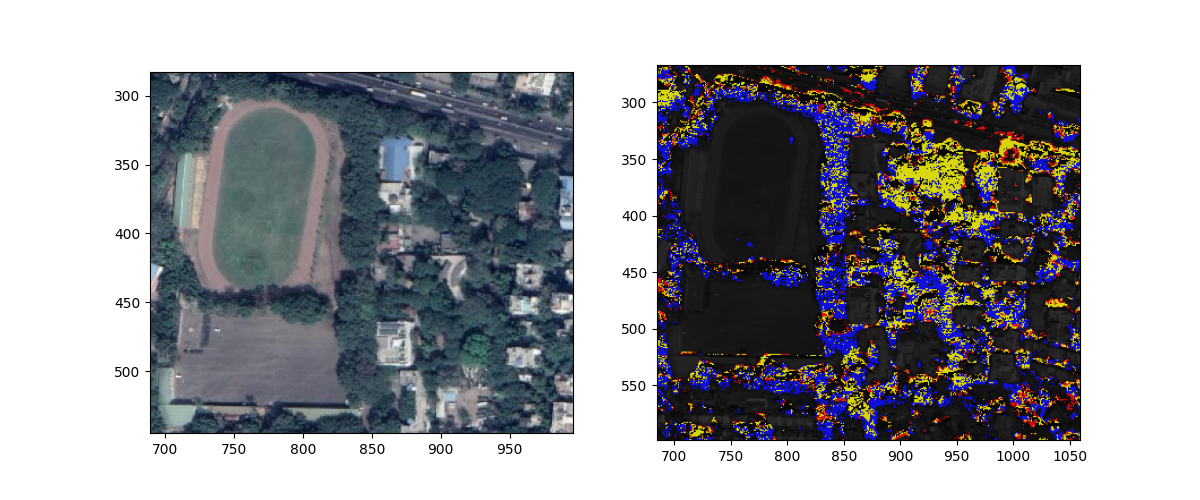

In [6]:
orig = cv.imread("/home/robin/rgb_good1.png")
orig = cv.cvtColor(orig, cv.COLOR_BGR2RGB)
mask_image = cv.imread("/home/robin/mask.png",0)
print(np.unique(mask_image))
mask_image = label2rgb(mask_image,image = orig, bg_label=0, bg_color=(0, 0, 0), alpha = 0.8)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
ax0.imshow(orig)
ax1.imshow(mask_image);

In [8]:
cv.imwrite("/home/robin/mask.png", closing)

True

In [7]:
import cv2
import numpy as np
immm= cv2.imread("/home/robin/mask.png")
np.unique(immm)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [ ]:
import numpy as np
import cv2 as cv
drawing = False # true if mouse is pressed

def toggle(event,x,y,flags,param):
    global drawing, final
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = not drawing
    if drawing:
        final = orig
    else:
        final = img


orig = cv.imread("/home/robin/Work/rgb_good_2.png")
img = cv.imread("/home/robin/mask.png")#cv.cvtColor(orig, cv.COLOR_BGR2HSV)
final = orig.copy()
cv.namedWindow("image", cv.WINDOW_NORMAL)
cv.setMouseCallback('image',toggle)

while True:
    
    cv.imshow("image", final)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

In [6]:

!rm -rf /home/robin/Desktop/New/
!mkdir -p /home/robin/Desktop/New

In [7]:
#crop images into patches
from PIL import Image
from itertools import product
import os

dir_out = "/home/robin/Desktop/New/"
#img = Image.fromarray(masks[0])
img =  Image.open("/home/robin/Work/rgb_good_2.png")
w, h = img.size
d = 512 #tile size    
grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
for num, i in enumerate(grid):
    
    box = (i[1], i[0], i[1]+d, i[0]+d)
    out = os.path.join(dir_out, f'{num}.png')
    img.crop(box).save(out)

In [2]:
#code created by Robin under Creative Commons Licence 
#Code to read Grayscale image and to threshold the percentage of the pixel value.
import numpy as np
import cv2 as cv
import sys

masks = []
class App():
    
    
    def update(self, dummy=None):
        #global gray
        if self.seed_pt is None:
            cv.namedWindow('grayval_filter', cv.WINDOW_NORMAL)
            
            cv.imshow('grayval_filter', self.img)
            return
        
        gray = self.img.copy()
        gray2 = self.img.copy()
        self.mask[:] = 0
        
        l_g = cv.getTrackbarPos("Lower_%", "grayval_filter")
        u_g = cv.getTrackbarPos("Upper_%", "grayval_filter")
        
        
        if self.seed_pt[0]<=gray.shape[1]:
            gray_val = gray[self.seed_pt[::-1]]
            lower_gray = abs(gray_val - gray_val*.01*l_g)
            upper_gray = gray_val + gray_val*.01*u_g
            print(gray_val, lower_gray, upper_gray)
            self.mask = cv.inRange(gray, int(lower_gray), int(upper_gray))
            result = cv.bitwise_and(gray, gray, mask=self.mask)
            cv.circle(result, self.seed_pt, 5, (255, 255, 255), -1)
            cv.circle(gray2, self.seed_pt, 5, (255, 255, 255), -1)
            final = cv.hconcat([gray2,result])
            cv.imshow('grayval_filter', final)
        
            
    
    def onmouse(self, event, x, y, flags, param):
        if flags & cv.EVENT_FLAG_LBUTTON:
            self.seed_pt = x,y
            
            self.update()
            
            
    def run(self):
        
        self.img = cv.imread("/home/robin/Downloads/saturation.png", 0)
        
        if self.img is None:
            print('Failed to load image file:')
            sys.exit(1)

        h, w = self.img.shape[:2]
        self.mask = np.zeros((h+2, w+2), np.uint8)
        self.seed_pt = None
        self.update()
        cv.setMouseCallback('grayval_filter', self.onmouse)
        cv.createTrackbar("Lower_%", "grayval_filter", 33, 100, self.update)
        cv.createTrackbar("Upper_%", "grayval_filter", 33, 100, self.update)
        
        while True:
            ch = cv.waitKey()
            if ch == 27:
                break
            if ch == ord('s'):
                masks.append(self.mask)
        print("Done")
        
App().run()
cv.destroyAllWindows()

92 61.64 122.36
Done


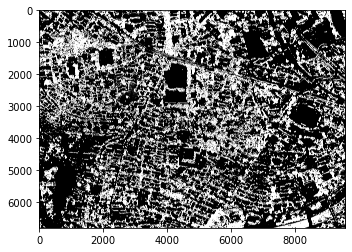

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv.imread("/home/robin/Downloads/saturation.png", 0)
#frame = np.zeros(img.shape[:2])
res = np.where(np.logical_and(img>= 80, img<150), 255, 0)


plt.imshow(res, cmap= 'gray')

In [7]:
plt.imsave("/home/robin/Work/veg_mask.png", res, cmap = 'gray')

In [13]:
import cv2 as cv
img = cv.imread('/home/robin/rgb_crop.png', 0)

im_mask = cv.inRange(gray, 50, 116)
cv.namedWindow('window_name', cv.WINDOW_NORMAL)
cv.imshow('window_name', im_mask)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
ddepth = cv.CV_16S
kernel_size = 3
window_name = "Laplace Demo"
# [reduce_noise]
# Remove noise by blurring with a Gaussian filter
src = cv.GaussianBlur(hsv_image[:,:,2], (3, 3), 0)
# [reduce_noise]

# [laplacian]
# Apply Laplace function
dst = cv.Laplacian(src, ddepth, ksize=kernel_size)

# converting back to uint8
abs_dst = cv.convertScaleAbs(dst)
# [convert]
# [display]

In [9]:
final = cv.hconcat([hsv_image,cv.cvtColor(abs_dst,cv.COLOR_GRAY2BGR) ])
cv.namedWindow(window_name, cv.WINDOW_NORMAL)
cv.imshow(window_name, final)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# %load /home/robin/Downloads/CannyDetector_Demo.py
from __future__ import print_function
import cv2 as cv
import numpy as np

max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3

def CannyThreshold(val):
    low_threshold = val
    img_blur = cv.blur(src_gray, (3,3))
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    final = cv.hconcat([cv.cvtColor(src_gray, cv.COLOR_GRAY2BGR), dst])
    cv.imshow(window_name, final)



src = cv.imread("/home/robin/rgb_crop.png")

img_hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
src_gray = img_hsv[:,:,2]
src_gray = src_gray[..., np.newaxis]

cv.namedWindow(window_name, cv.WINDOW_NORMAL)
cv.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)

CannyThreshold(0)
cv.waitKey()
cv.destroyAllWindows()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

In [ ]:
rgb_im = imread("/home/robin/Work/rgb_good_.jpg")
hsv_image = rgb2hsv(rgb_im)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for n, ax in enumerate(axes.flatten()):
    if n == 0:
        ax.imshow(island)
        
        ax.set_axis_off();
        continue
        
    ax.imshow(hsv_image[:,:,n-1], cmap='gray')
        
    ax.set_axis_off();
fig.tight_layout()

In [13]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread("/home/robin/Desktop/rgb/110.png")
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

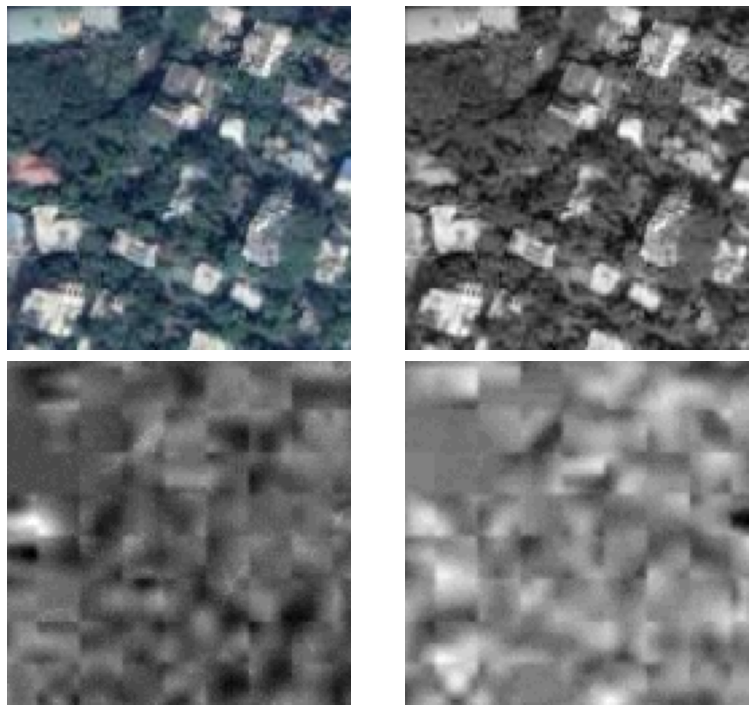

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for n, ax in enumerate(axes.flatten()):
    if n == 0:
        ax.imshow(im[...,::-1])
        
        ax.set_axis_off();
        continue
        
    ax.imshow(im_lab[:,:,n-1], cmap='gray')
        
    ax.set_axis_off();
fig.tight_layout()

In [3]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
hsv_image = rgb2hsv(island[:,:,:3])
imshow(hsv_image[:,:,0])
plt.show()
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(hsv_image[:,:,1])
plt.show()
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(hsv_image[:,:,2])
plt.show()


NameError: name 'plt' is not defined

In [3]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df
df_island = image_to_pandas(island)
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=  5, random_state = 42).fit(df_island)
result = kmeans.labels_.reshape(island.shape[0],island.shape[1])
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(result, cmap='twilight');

KeyboardInterrupt: 

Connected component analysis

In [10]:
import cv2
image = cv2.imread("/home/robin/rgb_crop.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
    thresh, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output
# loop over the number of unique connected component labels
for i in range(1, numLabels):
    # if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output = image.copy()
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(image, (int(cX), int(cY)), 4, (0, 0, 255), -1)
cv2.destroyAllWindows()



[INFO] examining component 2/203
[INFO] examining component 3/203
[INFO] examining component 4/203
[INFO] examining component 5/203
[INFO] examining component 6/203
[INFO] examining component 7/203
[INFO] examining component 8/203
[INFO] examining component 9/203
[INFO] examining component 10/203
[INFO] examining component 11/203
[INFO] examining component 12/203
[INFO] examining component 13/203
[INFO] examining component 14/203
[INFO] examining component 15/203
[INFO] examining component 16/203
[INFO] examining component 17/203
[INFO] examining component 18/203
[INFO] examining component 19/203
[INFO] examining component 20/203
[INFO] examining component 21/203
[INFO] examining component 22/203
[INFO] examining component 23/203
[INFO] examining component 24/203
[INFO] examining component 25/203
[INFO] examining component 26/203
[INFO] examining component 27/203
[INFO] examining component 28/203
[INFO] examining component 29/203
[INFO] examining component 30/203
[INFO] examining compo

In [17]:
from itertools import cycle

lst = ['a', 'b', 'c']

pool = cycle(lst)

In [41]:
next(pool)

'c'

In [43]:
a = 5
a if a<4 else 99

99

In [8]:
import numpy as np
import cv2
im = cv2.imread("/home/robin/Downloads/sat_img.png", 0)[:2000,:2000]
im2 = cv2.imread("/home/robin/Work/rgb_good_.jpg")[:2000,:2000]

In [9]:
cv2.namedWindow("hi", cv2.WINDOW_NORMAL)
cv2.imshow("hi", im)
cv2.namedWindow("hi2", cv2.WINDOW_NORMAL)
cv2.imshow("hi2", im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:

import cv2 as cv
import argparse
alpha_slider_max = 100
title_window = 'Linear Blend'
def on_trackbar(val):
    alpha = val / alpha_slider_max
    beta = ( 1.0 - alpha )
    dst = cv.addWeighted(src1, alpha, src2, beta, 0.0)
    cv.imshow(title_window, dst)

src1 = cv.imread("/home/robin/Work/veg_mask.png")[:3000,:3000]
src2 = cv.imread("/home/robin/Work/rgb_good_.jpg")[:3000,:3000]

cv.namedWindow(title_window, cv.WINDOW_NORMAL)
trackbar_name = 'Alpha x %d' % alpha_slider_max
cv.createTrackbar(trackbar_name, title_window , 0, alpha_slider_max, on_trackbar)
# Show some stuff
on_trackbar(0)
# Wait until user press some key
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
k1 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
k2 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
opening = cv.morphologyEx(masks[0], cv.MORPH_OPEN, kernel= k1, iterations = 3)

In [3]:
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel=k1, iterations = 1)


In [6]:
cv.namedWindow("hi2", cv.WINDOW_NORMAL)
cv.imshow("hi2", opening)
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
from PIL import Image

#build Gif
ll = [Image.open("/home/robin/Downloads/rgb_good_.jpg"), Image.open("/home/robin/Downloads/sat_img.png")]
ll[0].save("/home/robin/gif_sat.gif", save_all=True, append_images=ll, duration =.001, loop=0, transparency=0.7)

In [3]:
import imageio

# Build GIF
with imageio.get_writer('/home/robin/mygif.gif', mode='I') as writer:
    for filename in ['/home/robin/Work/rgb_good_.jpg', '/home/robin/Work/veg_mask.png']:
        image = imageio.imread(filename)[:3000,:3000]
        writer.append_data(image)

<IPython.core.display.Javascript object>


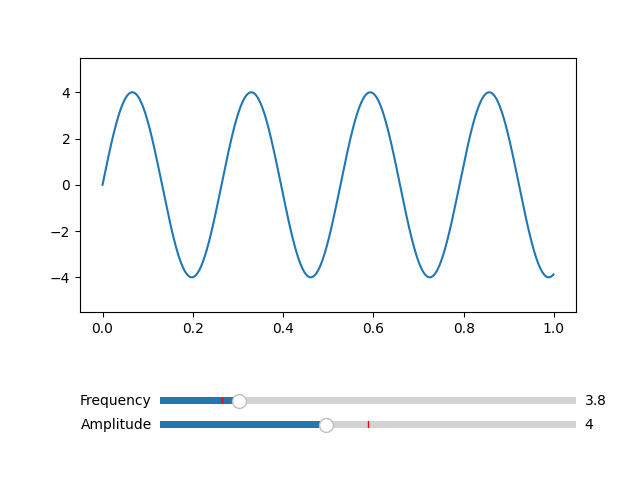

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib notebook
# Create subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)
 
# Create and plot sine wave
t = np.arange(0.0, 1.0, 0.001)
s = 5 * np.sin(2 * np.pi * 3 * t)
l, = plt.plot(t, s)
 
# Create axes for frequency and amplitude sliders
axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
axamplitude = plt.axes([0.25, 0.1, 0.65, 0.03])
 
# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
freq = Slider(axfreq, 'Frequency', 0.0, 20.0, 3)
 
# Create a slider from 0.0 to 10.0 in axes axfreq
# with 5 as initial value and valsteps of 1.0
amplitude = Slider(axamplitude, 'Amplitude', 0.0,
                   10.0, 5, valstep=1.0)
 
# Create fuction to be called when slider value is changed
 
def update(val):
    f = freq.val
    a = amplitude.val
    l.set_ydata(a*np.sin(2*np.pi*f*t))

#Call update function when slider value is changed
freq.on_changed(update)
amplitude.on_changed(update)
 
# display graph
plt.show()